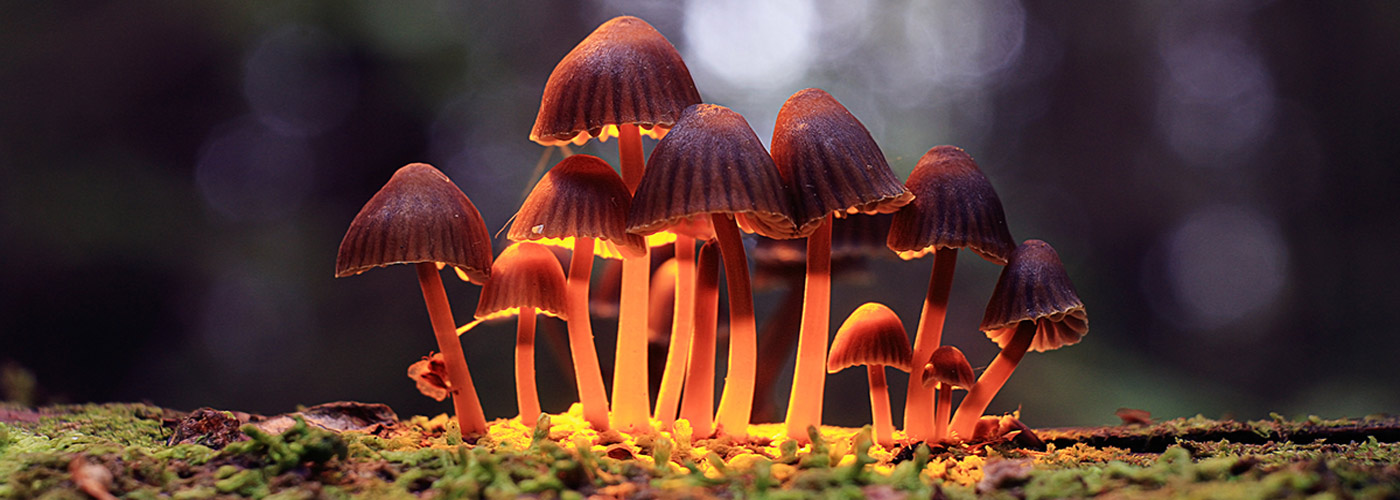

In [62]:
#Imports and load the data csv.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
df = pd.read_csv('D:\mushrooms.csv')

In [63]:
#Data frame first five rows
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [64]:
#Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [65]:
#Checking if have some null values for preparing the data
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [66]:
#Checking how many rows and columns we have.
df.shape

(8124, 23)

### Explanation of the relevant features

Attribute Information: (classes: edible = e, poisonous = p)

* cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
* cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
* cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
* bruises: yes = t, no = f
* odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
* gill-attachment: attached = a, descending = d, free = f, notched = n
* gill-spacing: close = c, crowded = w, distant = d
* gill-size: broad = b, narrow = n
* gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
* stalk-shape: enlarging = e, tapering = t
* stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
* stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
* stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
* veil-type: partial = p, universal = u
* veil-color: brown = n, orange = o, white = w, yellow = y
* ring-number: none = n, one = o, two = t
* ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
* spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
* population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
* habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

In [67]:
#preprocessing 
def Label_enc(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [68]:
for col in df.columns:
    df[str(col)] = Label_enc(df[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [69]:
df.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [70]:
y = df['class']
X = df.drop('class', axis=1)

In [71]:
X

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1           4            0  ...   
1                0          0           4            0  ...   
2                0          0           5            0  ...   
3                0          1           5            0  ...   
4                1          0           4            1  ...   
...            ...        ...         ...          ...  ...   
8119             0          0          11            0  ...   
8120             0          0          11            0  ...   
8121             0          0           5            0  ...   
8122             0          1           0            1  ...   
8123             0          0          11            0  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 22 columns]

In [72]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [73]:
X

cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0      1.029712     0.140128  -0.198250  1.185917  0.881938         0.162896   
1      1.029712     0.140128   1.765874  1.185917 -1.970316         0.162896   
2     -2.087047     0.140128   1.373049  1.185917 -0.544189         0.162896   
3      1.029712     0.953270   1.373049  1.185917  0.881938         0.162896   
4      1.029712     0.140128  -0.591075 -0.843230  0.406562         0.162896   
...         ...          ...        ...       ...       ...              ...   
8119  -0.216992     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8120   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8121  -0.840343     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8122  -0.216992     0.953270  -0.198250 -0.843230  1.832689         0.162896   
8123   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0        -0.438864   1.494683   -0.228998    -1.144806  ...   
1        -0.438864  -0.669038   -0.228998    -1.144806  ...   
2        -0.438864  -0.669038    0.053477    -1.144806  ...   
3        -0.438864   1.494683    0.053477    -1.144806  ...   
4         2.278612  -0.669038   -0.228998     0.873511  ...   
...            ...        ...         ...          ...  ...   
8119     -0.438864  -0.669038    1.748325    -1.144806  ...   
8120     -0.438864  -0.669038    1.748325    -1.144806  ...   
8121     -0.438864  -0.669038    0.053477    -1.144806  ...   
8122     -0.438864   1.494683   -1.358896     0.873511  ...   
8123     -0.438864  -0.669038    1.748325    -1.144806  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                     0.586385                0.622441   
1                     0.586385                0.622441   
2                     0.586385                0.622441   
3                     0.586385                0.622441   
4                     0.586385                0.622441   
...                        ...                     ...   
8119                  0.586385               -0.429288   
8120                  0.586385               -0.429288   
8121                  0.586385               -0.429288   
8122                 -0.893053                0.622441   
8123                  0.586385               -0.429288   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                   0.631991        0.0    0.142037    -0.256132   0.948081   
1                   0.631991        0.0    0.142037    -0.256132   0.948081   
2                   0.631991        0.0    0.142037    -0.256132   0.948081   
3                   0.631991        0.0    0.142037    -0.256132   0.948081   
4                   0.631991        0.0    0.142037    -0.256132  -1.272216   
...                      ...        ...         ...          ...        ...   
8119               -0.416681        0.0   -3.979055    -0.256132   0.948081   
8120               -0.416681        0.0   -8.100146    -0.256132   0.948081   
8121               -0.416681        0.0   -3.979055    -0.256132   0.948081   
8122                0.631991        0.0    0.142037    -0.256132  -1.272216   
8123               -0.416681        0.0   -3.979055    -0.256132   0.948081   

      spore-print-color  population   habitat  
0             -0.670195   -0.514389  2.030028  
1             -0.250471   -1.313108 -0.295730  
2             -0.250471   -1.313108  0.867149  
3             -0.670195   -0.514389  2.030028  
4             -0.250471   -2.910546 -0.295730  
...                 ...         ...       ...  
8119          -1.509643   -2.111827  0.285710  
8120          -1.509643    0.284330  0.285710  
8121          -1.509643   -2.111827  0.285710  
8122           1.428426    0.284330  0.285710  
8123           0.169254   -2.111827  0.285710  

[8124 rows x 22 columns]